# Assignment 1 – Data Classification

# Dataset: Iris 

To load and examine the structure of the Iris dataset using Python, you can use the pandas library. Here's how you can do it:-

The first 5 rows of the dataset are 
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Information
Number of instances  :  150
Number of attributes :  5

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Dataset Details :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null

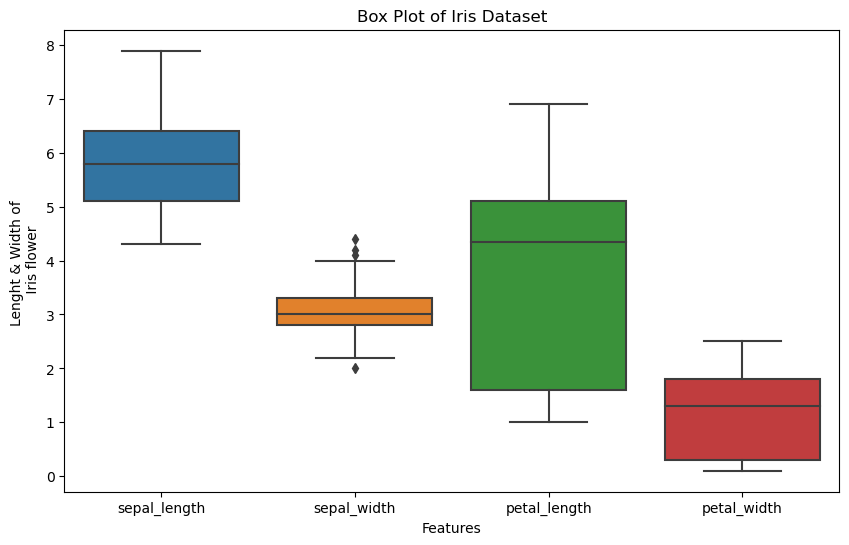

In [1]:
import pandas as pd

# Load the Iris dataset from the UCI Machine Learning Repository
data = "iris.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_dataframe = pd.read_csv(data, names = column_names)

# Display the first few rows of the dataset
print("The first 5 rows of the dataset are \n", iris_dataframe.head())

# Check the dimensions of the dataset, that is, number of rows and number of columns
print("\nDataset Information")
print("Number of instances  : ",iris_dataframe.shape[0])
print("Number of attributes : ",iris_dataframe.shape[1])

# Check the data types of each column on iris dataframe
print("\nData types:")
print(iris_dataframe.dtypes)

# Now, printing the dataset detail of iris dataframe
print("\nDataset Details :")
iris_dataframe.info(memory_usage = True)

# Performing statistical analysis on iris dataframe
print("\nStatistical Analysis:")
print(iris_dataframe.describe())

# Calculating the correlation matrix on iris dataframe
print("\nCorrelation Matrix:")
print(iris_dataframe.corr(numeric_only = True))


import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_dataframe.drop(columns='species'))
plt.title("Box Plot of Iris Dataset")
plt.xlabel("Features")
plt.ylabel("Lenght & Width of \n Iris flower")
plt.show()

Here, the dataset has successfully imported and it contains 6 columns and 150 observations with various data types (i.e, 4 coloumn are float and one is object).

## Handling Missing Values

The Iris dataset is a well-known dataset and is generally considered to be clean and free of missing values. However, we convert the missing values to NaNs then we will count the number of missing values in each column of the data.

In [2]:
# print("Missing Values: ", iris_dataframe.isnull().sum())
import numpy as np

iris_dataframe.replace('?',np.NaN)

print('Number of missing values:')
for col in iris_dataframe.columns:
    print('\t%s: %d' % (col,iris_dataframe[col].isna().sum()))

Number of missing values:
	sepal_length: 0
	sepal_width: 0
	petal_length: 0
	petal_width: 0
	species: 0


Hence, there are no missing values in the dataset.

## Data Encoding

Encoding is the process of converting the data or a given sequence of characters, symbols, alphabets etc., into a specified format. In this we assign unique values to all the categorical attribute. like pass as 1 and fail as 0.

There are two types of encoding

1. label encoding:
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

As you can see ‘Species’ column has 3 categories of flower. After Using Label Encoder we labeled the data as 0,1,2 ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica' respectively)

2. Onehot encoder:
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In the Iris dataset, the features (X) are the columns "sepal_length", "sepal_width", "petal_length", and "petal_width". The target variable (y) is the "species" column.

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Separate the features and the target variable
X = iris_dataframe.iloc[:, :-1]  # Features ("sepal_length", "sepal_width", "petal_length", and "petal_width")
y = iris_dataframe.iloc[:, -1]   # Target variable ("species")


# Perform Label Encoding on the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Perform OneHot Encoding on the target variable
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))


# Create a new DataFrame with the one-hot encoded target variable
iris_data_encoded = pd.concat([X, pd.DataFrame(y_onehot)], axis=1)
encoded_column_names = column_names[:-1] + list(label_encoder.classes_)
iris_data_encoded.columns = encoded_column_names

print("The New Encoded Column Names are given below:-\n",iris_data_encoded.columns)

# Display the first few rows of the preprocessed dataset
print("\n",iris_data_encoded.head())

The New Encoded Column Names are given below:-
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='object')

    sepal_length  sepal_width  petal_length  petal_width  Iris-setosa  \
0           5.1          3.5           1.4          0.2          1.0   
1           4.9          3.0           1.4          0.2          1.0   
2           4.7          3.2           1.3          0.2          1.0   
3           4.6          3.1           1.5          0.2          1.0   
4           5.0          3.6           1.4          0.2          1.0   

   Iris-versicolor  Iris-virginica  
0              0.0             0.0  
1              0.0             0.0  
2              0.0             0.0  
3              0.0             0.0  
4              0.0             0.0  


C:\Users\jasme\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Scale the normalized features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized)

# Create a new DataFrame with the scaled features and the one-hot encoded target variable
iris_data_transformed = pd.DataFrame(X_scaled, columns=column_names[:-1])
species_columns = [f"species_{class_}" for class_ in label_encoder.classes_]
iris_data_transformed[species_columns] = y_onehot

# Display the first few rows of the preprocessed dataset
print(iris_data_transformed.head())


   sepal_length  sepal_width  petal_length  petal_width  species_Iris-setosa  \
0     -0.900681     1.032057     -1.341272    -1.312977                  1.0   
1     -1.143017    -0.124958     -1.341272    -1.312977                  1.0   
2     -1.385353     0.337848     -1.398138    -1.312977                  1.0   
3     -1.506521     0.106445     -1.284407    -1.312977                  1.0   
4     -1.021849     1.263460     -1.341272    -1.312977                  1.0   

   species_Iris-versicolor  species_Iris-virginica  
0                      0.0                     0.0  
1                      0.0                     0.0  
2                      0.0                     0.0  
3                      0.0                     0.0  
4                      0.0                     0.0  


In [105]:
# Same Thing below:-

The first few rows of the preprocessed dataset, where the "species" column is replaced with one-hot encoded columns representing the species classes.

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# Separate the features and the target variable
X = iris_dataframe.iloc[:, :-1]  # Features ("sepal_length", "sepal_width", "petal_length", and "petal_width")
y = iris_dataframe.iloc[:, -1]   # Target variable ("species")

iris_dataframe['sepal_width'].value_counts()

le=LabelEncoder()
iris_dataframe['species']=le.fit_transform(y)
iris_dataframe['species'].value_counts()

le.classes_

# Onehot Encoder
iris_dataframe['species'].value_counts()
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(iris_dataframe['species'].values.reshape(-1,1)).toarray()
one_hot.categories_


transformed_data = pd.DataFrame(transformed_data , 
                                columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
transformed_data.head()

transformed_data.iloc[90, ]
iris_dataframe['species'][90]


1

In [24]:
# Normalization & Standardization

numeric_columns = [c for c in iris_dataframe.columns if iris_dataframe[c].dtype != np.dtype('O')]
numeric_columns

len(numeric_columns) , len(iris_dataframe.columns)

temp_data = iris_dataframe[numeric_columns]
temp_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
# Normalization


from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

normalizer = MinMaxScaler()
temp_data.dropna(axis = 1 , inplace = True)
normalized_data = normalizer.fit_transform(temp_data)
pd.DataFrame(normalized_data , columns = temp_data.columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [26]:
# Standardization


standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(temp_data)
pd.DataFrame(standardized_data , columns = temp_data.columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1.224745
146,0.553333,-1.281972,0.705893,0.922064,1.224745
147,0.795669,-0.124958,0.819624,1.053537,1.224745
148,0.432165,0.800654,0.933356,1.447956,1.224745


In [27]:
# Handling With Missing Values


numeric_data = iris_dataframe[numeric_columns]
numeric_data.isnull().sum()

# using Simple Imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
agent_col = imputer.fit_transform(numeric_data)
pd.DataFrame(agent_col).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

# Split the dataset into a training set (70%) and a test set (30%) using a random split.


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(iris_data_transformed.drop(species_columns, axis=1),
                                                    iris_data_transformed[species_columns],
                                                    test_size=0.3,
                                                    random_state=42)

# Display the shape of the training set and the test set
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (105, 4) (105, 3)
Test set shape: (45, 4) (45, 3)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict using the Decision Tree Classifier
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict using the Random Forest Classifier
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)



# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)


# Calculate the F1 score
f1 = classification_report(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the F1 score and accuracy
print("KNN classifier:\n")
print("F1 Score:\n", f1)
print("\nAccuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values
k_values = np.arange(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    


Decision Tree Accuracy: 0.9555555555555556
Random Forest Accuracy: 1.0
KNN classifier:

F1 Score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00   

In [ ]:
# SVM

In [11]:
# Convert one-hot encoded target variable back to 1-dimensional array
y_encoded = np.argmax(y_onehot, axis=1)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Create an instance of the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set using the trained classifier
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the performance of the SVM classifier
svm_accuracy = svm_classifier.score(X_test, y_test)
svm_classification_report = classification_report(y_test, svm_predictions)

# Print the accuracy and classification report of the SVM classifier
print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(svm_classification_report)


SVM Classifier:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

